# Rainfall Prediction Model Using Random Forest Algorithm

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.utils import resample
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.ensemble import RandomForestClassifier
import pickle

In [3]:
data = pd.read_csv("../dataset/Rainfall.csv")
data.head(10)

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1,1025.9,19.9,18.3,16.8,13.1,72,49,yes,9.3,80.0,26.3
1,2,1022.0,21.7,18.9,17.2,15.6,81,83,yes,0.6,50.0,15.3
2,3,1019.7,20.3,19.3,18.0,18.4,95,91,yes,0.0,40.0,14.2
3,4,1018.9,22.3,20.6,19.1,18.8,90,88,yes,1.0,50.0,16.9
4,5,1015.9,21.3,20.7,20.2,19.9,95,81,yes,0.0,40.0,13.7
5,6,1018.8,24.3,20.9,19.2,18.0,84,51,yes,7.7,20.0,14.5
6,7,1021.8,21.4,18.8,17.0,15.0,79,56,no,3.4,30.0,21.5
7,8,1020.8,21.0,18.4,16.5,14.4,78,28,no,7.7,60.0,14.3
8,9,1020.6,18.9,18.1,17.1,14.3,78,79,no,3.3,70.0,39.3
9,10,1017.5,18.5,18.0,17.2,15.5,85,91,yes,0.0,70.0,37.7


In [4]:
data.shape

(366, 12)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 366 entries, 0 to 365
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   day                     366 non-null    int64  
 1   pressure                366 non-null    float64
 2   maxtemp                 366 non-null    float64
 3   temparature             366 non-null    float64
 4   mintemp                 366 non-null    float64
 5   dewpoint                366 non-null    float64
 6   humidity                366 non-null    int64  
 7   cloud                   366 non-null    int64  
 8   rainfall                366 non-null    object 
 9   sunshine                366 non-null    float64
 10           winddirection  365 non-null    float64
 11  windspeed               365 non-null    float64
dtypes: float64(8), int64(3), object(1)
memory usage: 34.4+ KB


In [6]:
data.duplicated().sum()

np.int64(0)

In [7]:
data.isnull().sum()

day                       0
pressure                  0
maxtemp                   0
temparature               0
mintemp                   0
dewpoint                  0
humidity                  0
cloud                     0
rainfall                  0
sunshine                  0
         winddirection    1
windspeed                 1
dtype: int64

In [8]:
# Assuming df is your DataFrame
data.columns = data.columns.str.strip()

In [9]:
data.isnull().sum()

day              0
pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
rainfall         0
sunshine         0
winddirection    1
windspeed        1
dtype: int64

In [10]:
data["rainfall"].value_counts()

rainfall
yes    249
no     117
Name: count, dtype: int64

In [11]:
percentages = data['rainfall'].value_counts(normalize=True) * 100
print(percentages)

rainfall
yes    68.032787
no     31.967213
Name: proportion, dtype: float64


In [12]:
data.sample(10)

,day,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
242,30,1006.8,27.9,26.6,25.8,25.2,92,88,yes,0.0,220.0,5.9
29,30,1020.0,19.9,17.6,16.2,15.5,88,80,no,3.3,50.0,21.2
207,26,1008.3,32.0,29.4,27.0,26.4,84,57,yes,7.4,60.0,17.5
46,16,1025.4,15.1,12.8,10.9,6.0,63,89,no,0.7,20.0,23.5
354,20,1022.5,18.6,17.6,17.0,12.9,75,88,yes,0.0,40.0,19.0
299,26,1016.8,26.2,25.4,24.5,22.3,83,81,yes,0.8,80.0,28.9
188,7,1005.9,34.0,30.2,27.9,25.6,77,53,yes,10.5,270.0,11.3
176,25,1008.9,35.5,31.4,28.9,26.1,74,39,no,10.6,150.0,9.1
39,9,1020.8,21.2,16.7,12.7,7.2,54,29,no,10.2,40.0,17.2
255,12,1011.5,30.5,27.9,26.2,23.2,76,66,yes,6.7,90.0,22.6


In [13]:
# dropping the unwanted features
data = data.drop("day", axis=1)
data.sample(10)

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
239,1008.1,32.4,29.0,27.0,25.0,79,75,no,6.7,200.0,12.0
336,1017.1,25.0,23.3,22.2,19.6,80,69,yes,6.3,70.0,15.9
66,1014.9,21.3,19.7,18.9,18.2,91,76,yes,0.0,40.0,13.8
159,1006.3,30.0,27.1,24.1,25.1,89,85,yes,3.1,190.0,12.6
310,1015.6,26.3,25.5,24.7,22.4,83,81,yes,0.5,80.0,30.2
57,1024.7,17.5,15.5,13.8,11.7,79,79,yes,5.0,20.0,9.1
305,1020.9,24.5,22.9,20.5,17.8,73,61,no,4.3,20.0,29.6
52,1020.6,17.6,16.1,14.6,14.7,91,88,yes,0.3,50.0,24.4
156,1008.8,30.4,26.9,25.0,24.3,86,87,yes,0.7,20.0,9.8
236,1002.4,33.2,30.7,28.3,24.3,70,48,no,7.8,10.0,11.0


In [14]:
data.isnull().sum()

pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
rainfall         0
sunshine         0
winddirection    1
windspeed        1
dtype: int64

In [15]:
data["winddirection"].unique()

array([ 80.,  50.,  40.,  20.,  30.,  60.,  70.,  10., 200., 220., 120.,
       190., 210., 300., 240., 180., 230.,  90., 170., 150., 100., 130.,
        nan, 160., 270., 280., 250., 260., 290., 350., 110., 140.])

In [16]:
data["winddirection"].median()

np.float64(70.0)

In [17]:
data["winddirection"].mode()

0    20.0
Name: winddirection, dtype: float64

In [18]:
data["windspeed"].median()

np.float64(20.5)

In [19]:
data["windspeed"].mean()

np.float64(21.53698630136986)

In [20]:
data["windspeed"].mode()

0    14.5
Name: windspeed, dtype: float64

In [21]:
# filling the missing values
data["winddirection"] = data["winddirection"].fillna(data["winddirection"].mode()[0])
data["windspeed"] = data["windspeed"].fillna(data["windspeed"].median())

In [22]:
data.isnull().sum()

pressure         0
maxtemp          0
temparature      0
mintemp          0
dewpoint         0
humidity         0
cloud            0
rainfall         0
sunshine         0
winddirection    0
windspeed        0
dtype: int64

In [23]:
data["winddirection"].unique()

array([ 80.,  50.,  40.,  20.,  30.,  60.,  70.,  10., 200., 220., 120.,
       190., 210., 300., 240., 180., 230.,  90., 170., 150., 100., 130.,
       160., 270., 280., 250., 260., 290., 350., 110., 140.])

In [24]:
data["rainfall"].value_counts()

rainfall
yes    249
no     117
Name: count, dtype: int64

In [25]:
# encoding the rainfall feature into numerical: yes-->1, no-->0
data["rainfall"] = data["rainfall"].replace(
    {"yes": 1, "no": 0}
)

/tmp/ipykernel_5572/1650937539.py:2: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  data["rainfall"] = data["rainfall"].replace(


In [26]:
data["rainfall"].value_counts()

rainfall
1    249
0    117
Name: count, dtype: int64

In [27]:
sns.set_theme(
    style="whitegrid",
    context="paper",
    palette="deep",
    font="sans-serif",
    font_scale=1,
    rc=None
)

In [28]:
data.describe()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
count,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000,366.000000
mean,1013.742623,26.191257,23.747268,21.894536,19.989071,80.177596,71.128415,0.680328,4.419399,101.284153,21.534153
std,6.414776,5.978343,5.632813,5.594153,5.997021,10.062470,21.798012,0.466988,3.934398,81.722827,10.056054
min,998.500000,7.100000,4.900000,3.100000,-0.400000,36.000000,0.000000,0.000000,0.000000,10.000000,4.400000
25%,1008.500000,21.200000,18.825000,17.125000,16.125000,75.000000,58.000000,0.000000,0.500000,40.000000,13.725000
50%,1013.000000,27.750000,25.450000,23.700000,21.950000,80.500000,80.000000,1.000000,3.500000,70.000000,20.500000
75%,1018.100000,31.200000,28.600000,26.575000,25.000000,87.000000,88.000000,1.000000,8.200000,190.000000,27.825000
max,1034.600000,36.300000,32.400000,30.000000,26.700000,98.000000,100.000000,1.000000,12.100000,350.000000,59.500000


In [29]:
data.corr()

,pressure,maxtemp,temparature,mintemp,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
pressure,1.000000,-0.829088,-0.851780,-0.839851,-0.860232,-0.274907,0.005621,-0.089275,-0.198171,-0.656828,0.373587
maxtemp,-0.829088,1.000000,0.986193,0.961534,0.899829,0.021882,-0.289765,-0.101003,0.507416,0.625447,-0.442095
temparature,-0.851780,0.986193,1.000000,0.990187,0.936866,0.092030,-0.205895,-0.037360,0.420545,0.645266,-0.393619
mintemp,-0.839851,0.961534,0.990187,1.000000,0.944515,0.139040,-0.156097,-0.007697,0.368288,0.629738,-0.359013
dewpoint,-0.860232,0.899829,0.936866,0.944515,1.000000,0.425282,0.044635,0.139916,0.185234,0.623952,-0.378227
humidity,-0.274907,0.021882,0.092030,0.139040,0.425282,1.000000,0.655493,0.489623,-0.563579,0.099471,-0.076740
cloud,0.005621,-0.289765,-0.205895,-0.156097,0.044635,0.655493,1.000000,0.625766,-0.848334,-0.077037,0.258248
rainfall,-0.089275,-0.101003,-0.037360,-0.007697,0.139916,0.489623,0.625766,1.000000,-0.552519,-0.015058,0.154193
sunshine,-0.198171,0.507416,0.420545,0.368288,0.185234,-0.563579,-0.848334,-0.552519,1.000000,0.251374,-0.298922
winddirection,-0.656828,0.625447,0.645266,0.629738,0.623952,0.099471,-0.077037,-0.015058,0.251374,1.000000,-0.219379


In [30]:
data.shape

(366, 11)

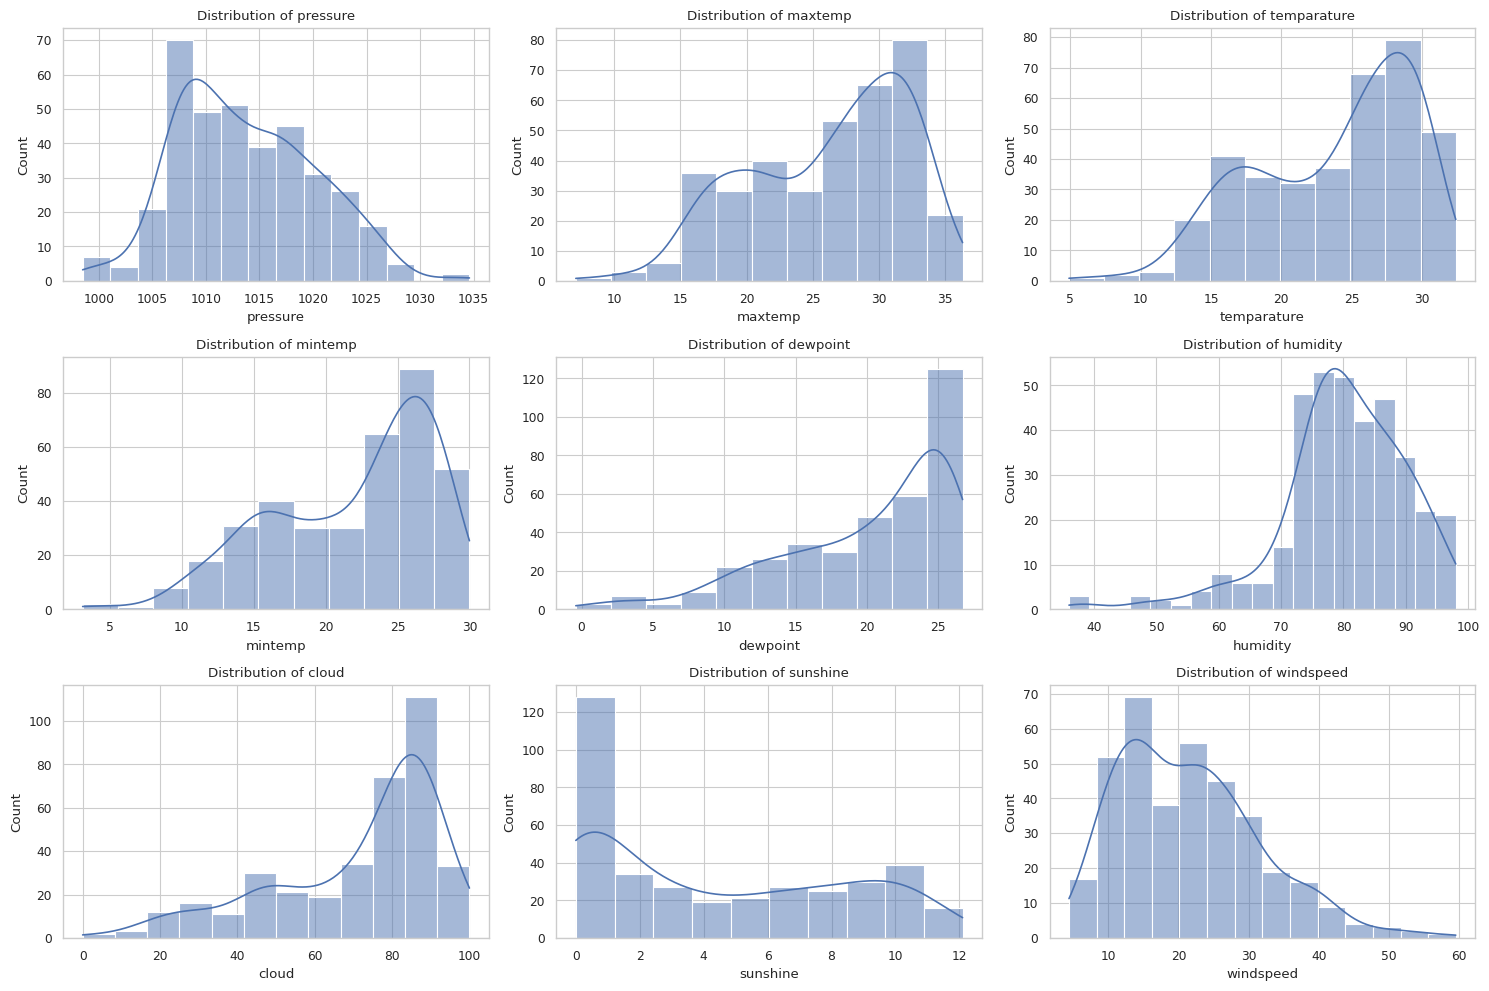

In [31]:
# plotting
plot_columns = ["pressure", "maxtemp", "temparature", "mintemp", "dewpoint", "humidity", "cloud", "sunshine", "windspeed"]

plt.figure(figsize=(15, 10))
for i, column in enumerate(plot_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(data[column], kde=True)
    plt.title(f"Distribution of {column}")
plt.tight_layout()
plt.show()

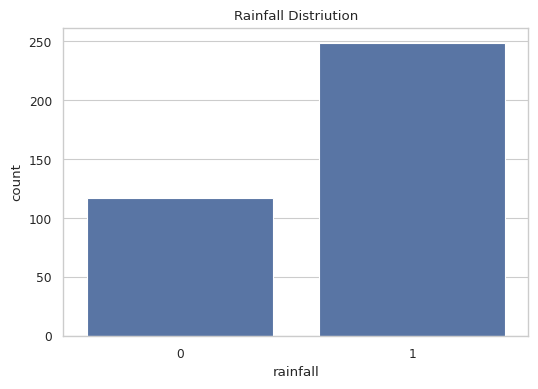

In [32]:
# rainfall distribution
plt.figure(figsize=(6, 4))
sns.countplot(x="rainfall", data=data)
plt.title("Rainfall Distriution")
plt.show()

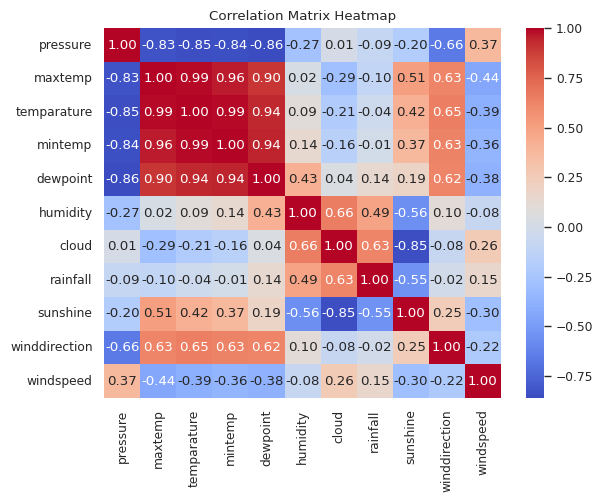

In [33]:
# correlation matrix
corr = data.corr()

plt.Figure(figsize=(10, 8))
sns.heatmap(
    corr,
    annot=True,
    cmap="coolwarm",
    fmt=".2f"
)
plt.title("Correlation Matrix Heatmap")
plt.show()

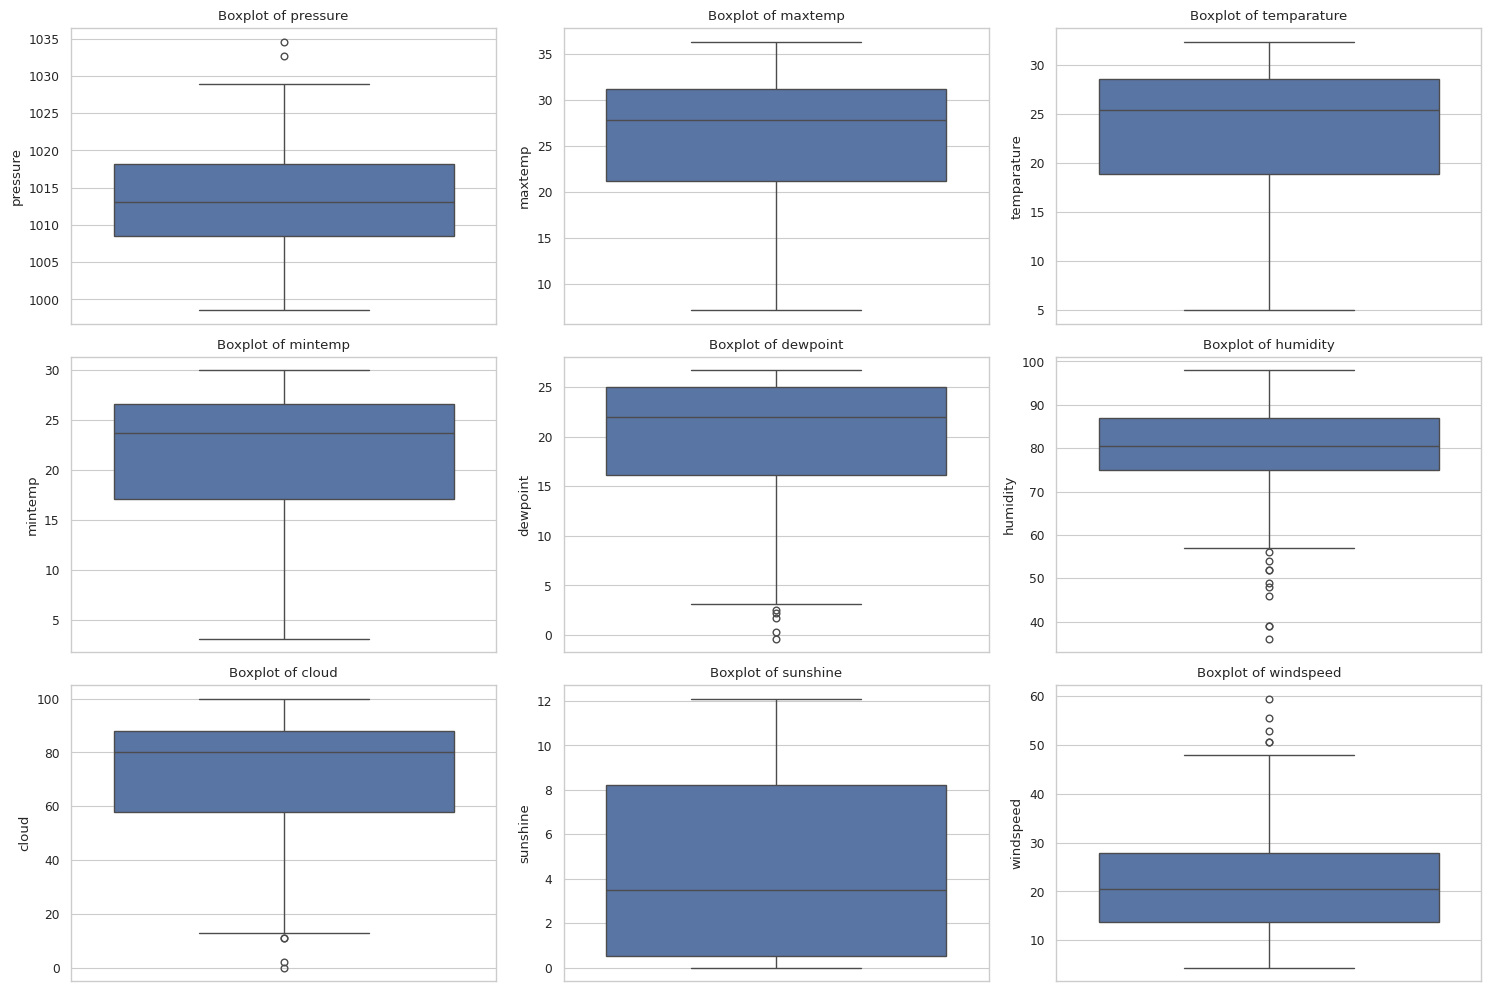

In [34]:
# box plot distributions
plt.figure(figsize=(15, 10))
for i, column in enumerate(plot_columns, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(data[column])
    plt.title(f"Boxplot of {column}")
plt.tight_layout()
plt.show()

In [35]:
# dropping temperature files t avoid multicolinearity
data = data.drop(columns=["maxtemp", "mintemp", "temparature"])
data.sample(10)

,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
59,1024.4,10.1,61,19,0,10.7,40.0,16.9
225,1007.9,25.6,87,84,1,0.1,230.0,22.9
167,1006.7,25.9,82,88,1,1.6,230.0,23.2
152,1007.8,26.2,80,73,0,7.2,230.0,31.7
217,1006.1,24.4,74,27,0,10.8,220.0,8.7
319,1015.2,22.3,89,84,1,0.1,80.0,35.8
194,1005.0,26.1,87,82,1,2.2,160.0,12.6
156,1008.8,24.3,86,87,1,0.7,20.0,9.8
12,1020.8,12.1,77,34,0,9.1,30.0,24.4
172,1009.3,25.6,75,51,0,10.0,200.0,12.6


In [36]:
# separating the majority and minority classes
majority = data[data["rainfall"] == 1]
minority = data[data["rainfall"] == 0]
print(majority.shape, minority.shape)

(249, 8) (117, 8)


In [37]:
# downsampling the majority classs
n_samples = len(minority)
majority_res = resample(
    majority,
    replace=False,
    n_samples=n_samples,
    random_state=21
)
print(majority.shape, majority_res.shape, minority.shape)

(249, 8) (117, 8) (117, 8)


In [38]:
data_resampled = pd.concat([
    majority_res,
    minority
])
data_resampled.shape

(234, 8)

In [39]:
data_resampled["rainfall"].value_counts()

rainfall
1    117
0    117
Name: count, dtype: int64

In [40]:
data_resampled.head(18)

,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
254,1011.1,23.7,77,46,1,8.4,100.0,21.4
361,1022.7,15.0,84,90,1,0.0,30.0,18.4
337,1019.4,16.5,77,93,1,0.0,20.0,27.9
260,1014.6,24.2,79,72,1,7.1,70.0,27.4
363,1025.9,13.3,75,78,1,4.6,70.0,33.4
162,1005.9,25.4,93,85,1,0.0,230.0,20.0
222,1004.5,25.2,85,88,1,0.6,230.0,20.2
232,1006.3,26.1,84,67,1,5.0,270.0,6.9
224,1007.9,25.8,79,78,1,9.1,220.0,11.9
9,1017.5,15.5,85,91,1,0.0,70.0,37.7


In [41]:
data = data_resampled.sample(
    frac=1,
    random_state=21
).reset_index(drop=True)

In [42]:
data.head(10)

,pressure,dewpoint,humidity,cloud,rainfall,sunshine,winddirection,windspeed
0,1011.3,20.9,70,45,1,7.1,20.0,20.4
1,1026.4,3.1,48,11,0,9.5,40.0,25.2
2,1008.1,25.0,72,38,0,11.2,180.0,9.0
3,1007.2,25.9,87,82,1,0.5,250.0,21.3
4,1016.2,17.1,83,88,0,0.2,70.0,39.5
5,1004.5,25.2,85,88,1,0.6,230.0,20.2
6,1024.1,10.0,65,58,0,5.6,60.0,26.9
7,1001.0,25.9,75,46,0,10.4,280.0,23.5
8,1009.5,25.7,79,72,0,7.0,220.0,25.2
9,1011.2,24.6,78,69,0,10.7,20.0,11.8


In [43]:
data["rainfall"].value_counts()

rainfall
1    117
0    117
Name: count, dtype: int64

In [44]:
# separating the target from features
X, y = data.drop("rainfall", axis=1), data["rainfall"]
X.shape

(234, 7)

In [45]:
y

0      1
1      0
2      0
3      1
4      0
      ..
229    1
230    1
231    1
232    0
233    0
Name: rainfall, Length: 234, dtype: int64

In [46]:
# train test splitting
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    stratify=y,
    random_state=21
)
print(X_train.shape, X_test.shape)

(187, 7) (47, 7)


In [47]:
model = RandomForestClassifier(random_state=21)
model.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [48]:
# parameter grid
param_grid = {
    "n_estimators": [50, 100, 200, 300],
    "max_features": ["sqrt", "log2"],
    "max_depth": [None, 10, 20, 30, 40],
    "min_samples_split": [2, 5, 10, 12],
    "min_samples_leaf": [1, 2, 5, 6]
}

In [49]:
# tuning
grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    cv=5,
    n_jobs=1,
    verbose=2
)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 640 candidates, totalling 3200 fits
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.1s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=50; total time=   0.2s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.3s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=   0.4s
[CV] END max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_

,estimator,RandomForestC...ndom_state=21)
,param_grid,"{'max_depth': [None, 10, ...], 'max_features': ['sqrt', 'log2'], 'min_samples_leaf': [1, 2, ...], 'min_samples_split': [2, 5, ...], ...}"
,scoring,None
,n_jobs,1
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,300


In [50]:
best_model = grid_search.best_estimator_
print(grid_search.best_params_)

{'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 300}


In [51]:
# base model ecaluation
cv_scores = cross_val_score(
    best_model,
    X_train,
    y_train,
    cv=5
)
mean_cv_score = np.mean(cv_scores)
print("Cross Validation Score:\n", cv_scores)
print("Mean Cross Validation Score:\n", mean_cv_score)

Cross Validation Score:
 [0.76315789 0.81578947 0.7027027  0.78378378 0.83783784]
Mean Cross Validation Score:
 0.7806543385490754


In [53]:
# perfomance test
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
clf_report = classification_report(y_test, y_pred)

print("Test Set Accuracy Score:\n", accuracy)
print("\nConfusion Matrix:\n", conf_matrix)
print("\nClassification Report:\n", clf_report)

Test Set Accuracy Score:
 0.7659574468085106

Confusion Matrix:
 [[19  4]
 [ 7 17]]

Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.83      0.78        23
           1       0.81      0.71      0.76        24

    accuracy                           0.77        47
   macro avg       0.77      0.77      0.77        47
weighted avg       0.77      0.77      0.77        47



In [54]:
X_train.columns

Index(['pressure', 'dewpoint', 'humidity', 'cloud', 'sunshine',
       'winddirection', 'windspeed'],
      dtype='object')

In [57]:
# testing with a predictive system
input_data = [1015.9, 19.9, 95, 81, 0.0, 40, 13.7]
columns = ['pressure', 'dewpoint', 'humidity', 'cloud', 'sunshine', 'winddirection', 'windspeed']
input_df = pd.DataFrame(
    [input_data],
    columns=columns
)
prediction = best_model.predict(input_df)

print("Prediction Result:", "Rainfall" if prediction[0] == 1 else "No Rainfall")

Prediction Result: Rainfall
